In [27]:
import pandas as pd
import numpy as np
import sklearn as skt
import matplotlib.pyplot as plt


In [28]:
data=pd.read_csv("train.csv")
dt=pd.read_csv("test.csv")

In [29]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [30]:
data.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [31]:
data.info()
data.count()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [32]:
pd.crosstab(data.Sex,data.Survived)

Survived,0,1
Sex,,
female,81,233
male,468,109


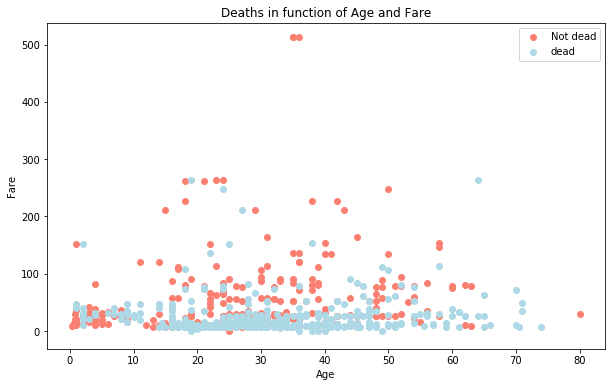

In [33]:
plt.figure(figsize=(10,6))

# Start with positve examples
plt.scatter(data.Age[data.Survived==1], 
            data.Fare[data.Survived==1], 
            c="salmon") # define it as a scatter figure

# Now for negative examples, we want them on the same plot, so we call plt again
plt.scatter(data.Age[data.Survived==0], 
            data.Fare[data.Survived==0], 
            c="lightblue") # axis always come as (x, y)

# Add some helpful info
plt.title("Deaths in function of Age and Fare")
plt.xlabel("Age")
plt.legend(["Not dead", "dead"])
plt.ylabel("Fare");

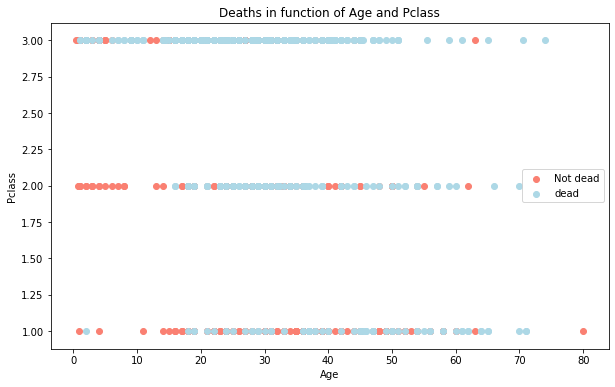

In [60]:
plt.figure(figsize=(10,6))

# Start with positve examples
plt.scatter(data.Age[data.Survived==1], 
            data.Pclass[data.Survived==1], 
            c="salmon") # define it as a scatter figure

# Now for negative examples, we want them on the same plot, so we call plt again
plt.scatter(data.Age[data.Survived==0], 
            data.Pclass[data.Survived==0], 
            c="lightblue") # axis always come as (x, y)

# Add some helpful info
plt.title("Deaths in function of Age and Pclass")
plt.xlabel("Age")
plt.legend(["Not dead", "dead"])
plt.ylabel("Pclass");

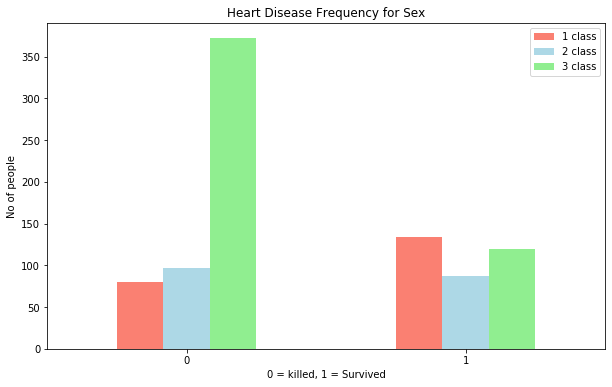

In [66]:
# Create a plot
pd.crosstab(data.Survived, data.Pclass).plot(kind="bar", figsize=(10,6), color=["salmon", "lightblue","lightgreen"])

# Add some attributes to it
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = killed, 1 = Survived")
plt.ylabel("No of people")
plt.legend(["1 class", "2 class","3 class"])
plt.xticks(rotation=0); # keep the labels on the x-axis vertical

In [34]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [35]:
data.dropna(subset=["Embarked"], inplace=True)

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 90.3+ KB


In [37]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [38]:
data['Age'] = data[['Age','Pclass']].apply(impute_age,axis=1)

In [39]:
#Building a pipeline for categorical fceatures
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [40]:
categorical_features=["Sex","Embarked","Ticket"]
categorical_transformer = Pipeline(steps=[
    # Set SimpleImputer strategy to "constant" and fill value to "missing"
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    # Set OneHotEncoder to ignore the unknowns
    ("onehot", OneHotEncoder(handle_unknown="ignore"))])

In [41]:
preprocessor = ColumnTransformer(
    transformers=[
        # Use the categorical_transformer to transform the categorical_features
        ("cat", categorical_transformer, categorical_features)])


In [42]:
#importing models
# Import LinearSVC from sklearn's svm module
from sklearn.svm import LinearSVC

# Import KNeighborsClassifier from sklearn's neighbors module
from sklearn.neighbors import KNeighborsClassifier

# Import SVC from sklearn's svm module
from sklearn.svm import SVC

# Import LogisticRegression from sklearn's linear_model module
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

In [43]:
models = {"LinearSVC": LinearSVC(),
          "KNN": KNeighborsClassifier(),
          "SVC": SVC(),
          "LogisticRegression": LogisticRegression(),
          "RandomForestClassifier": RandomForestClassifier(),
          "GBC":GradientBoostingClassifier(),
          "LogisticRegression": LogisticRegression()}
Results={}


In [44]:
datax=data.drop("Survived",axis=1)
datay=data["Survived"]
datax=datax.drop("Name",axis=1)
datax=datax.drop("Cabin",axis=1)
dt=dt.drop("Cabin",axis=1)
dt=dt.drop("Name",axis=1)
#datax=data.drop("Ticket",axis=1)

In [45]:
datax_train,datax_test,datay_train,datay_test=train_test_split(datax,datay,test_size=0.2,random_state=42)
datax_train.shape,datax_test.shape,datay_train.shape,datay_test.shape

((711, 9), (178, 9), (711,), (178,))

In [46]:
for model_name,model in models.items():
    model_pipeline=Pipeline(steps=[("Preprocessor",preprocessor),("model",model)])
    print(f"Fitting {model_name}...")
    model_pipeline.fit(datax_train, datay_train)
    print(f"Scoring {model_name}...")
    Results[model_name] = model_pipeline.score(datax_test, 
                                                          datay_test)

Fitting LinearSVC...
Scoring LinearSVC...
Fitting KNN...
Scoring KNN...
Fitting SVC...
Scoring SVC...
Fitting LogisticRegression...
Scoring LogisticRegression...
Fitting RandomForestClassifier...
Scoring RandomForestClassifier...
Fitting GBC...
Scoring GBC...


In [47]:
Results

{'LinearSVC': 0.8089887640449438,
 'KNN': 0.7752808988764045,
 'SVC': 0.7921348314606742,
 'LogisticRegression': 0.7921348314606742,
 'RandomForestClassifier': 0.8089887640449438,
 'GBC': 0.7921348314606742}

In [48]:
#I have chosen random forrest classifier
RFC=RandomForestClassifier()
model_pipeline=Pipeline(steps=[("Preprocessor",preprocessor),("model",RFC)])
model_pipeline.fit(datax_train, datay_train)
model_pipeline.score(datax_test, datay_test)

0.8089887640449438

In [51]:
y_preds=model_pipeline.predict(dt)
y_preds[:50]

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1], dtype=int64)

In [57]:
submission=pd.DataFrame()
submission['PassengerId']=dt['PassengerId']
submission['Survived']=y_preds
submission.tail()

,PassengerId,Survived
413,1305,0
414,1306,1
415,1307,0
416,1308,0
417,1309,0


In [58]:
submission.to_csv('submission.csv',index=False)
submission_check=pd.read_csv('submission.csv')
submission_check.tail()

,PassengerId,Survived
413,1305,0
414,1306,1
415,1307,0
416,1308,0
417,1309,0


In [ ]:
print(classification_report(datay_test, y_preds))